# CENSUS INCOME PROJECT 

In [ ]:
Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [ ]:
Importing the dataset

In [2]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# EDA(Exploratory Data Analysis)

# Preview dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Shape of dataset
df.shape

(32560, 15)

In [6]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
There are no Null values.It is a good for our data

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
We can see some pretty obvious outliers in capital_gain and capital_loss columns. We will be treating those later

Convert target column to binary float values

In [9]:
df = df.drop_duplicates()
df.shape

(32536, 15)

In [10]:
# Check unique values:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
inc = []
for i in df['Income']:
    if i == ' <=50K':
        inc.append(0)
    else:
        inc.append(1)
        
df['Income']=inc
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [14]:
## Now we convert the categorical columns to float/integer columns


categorical_columns = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']


In [15]:
for i in categorical_columns:
    print(df[i].unique())    

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany'

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lab = LabelEncoder()

In [18]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
Now that we have cleaned our dataset, we are ready to now begin visualizing it

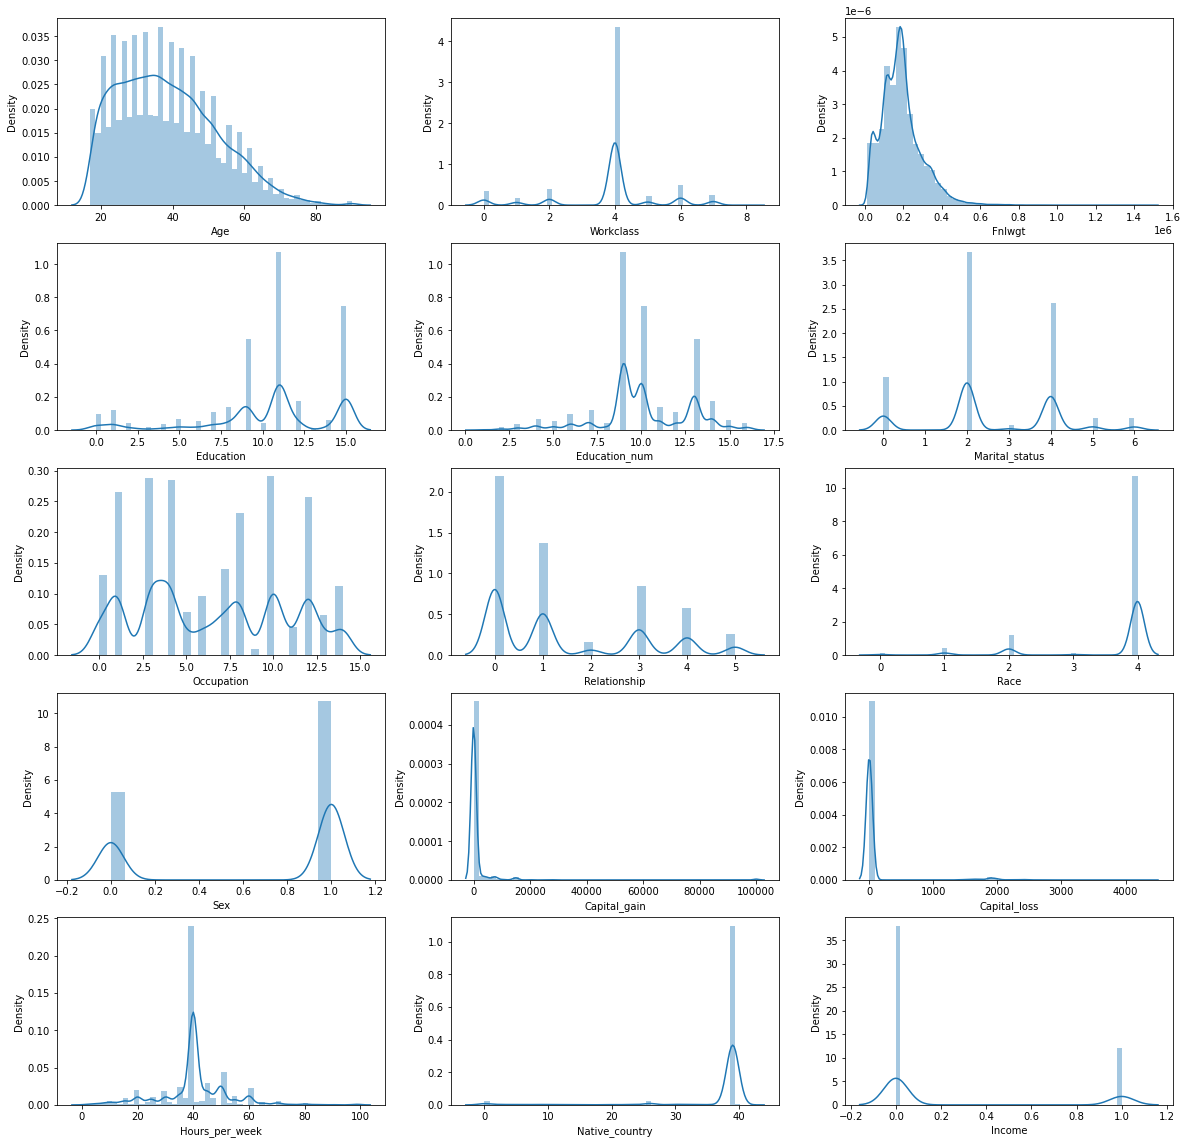

In [19]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

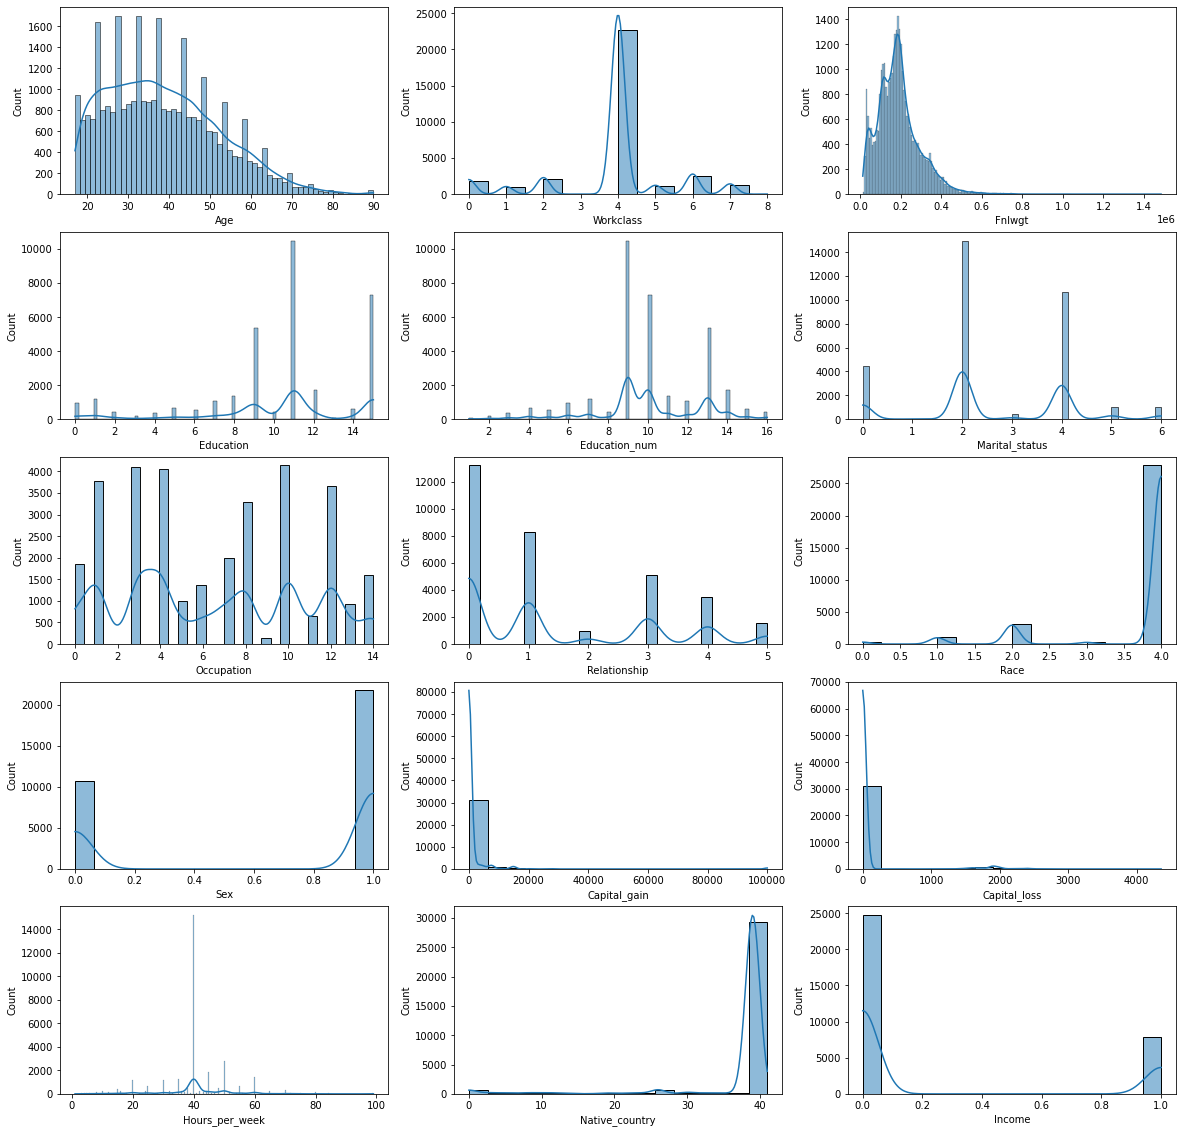

In [20]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

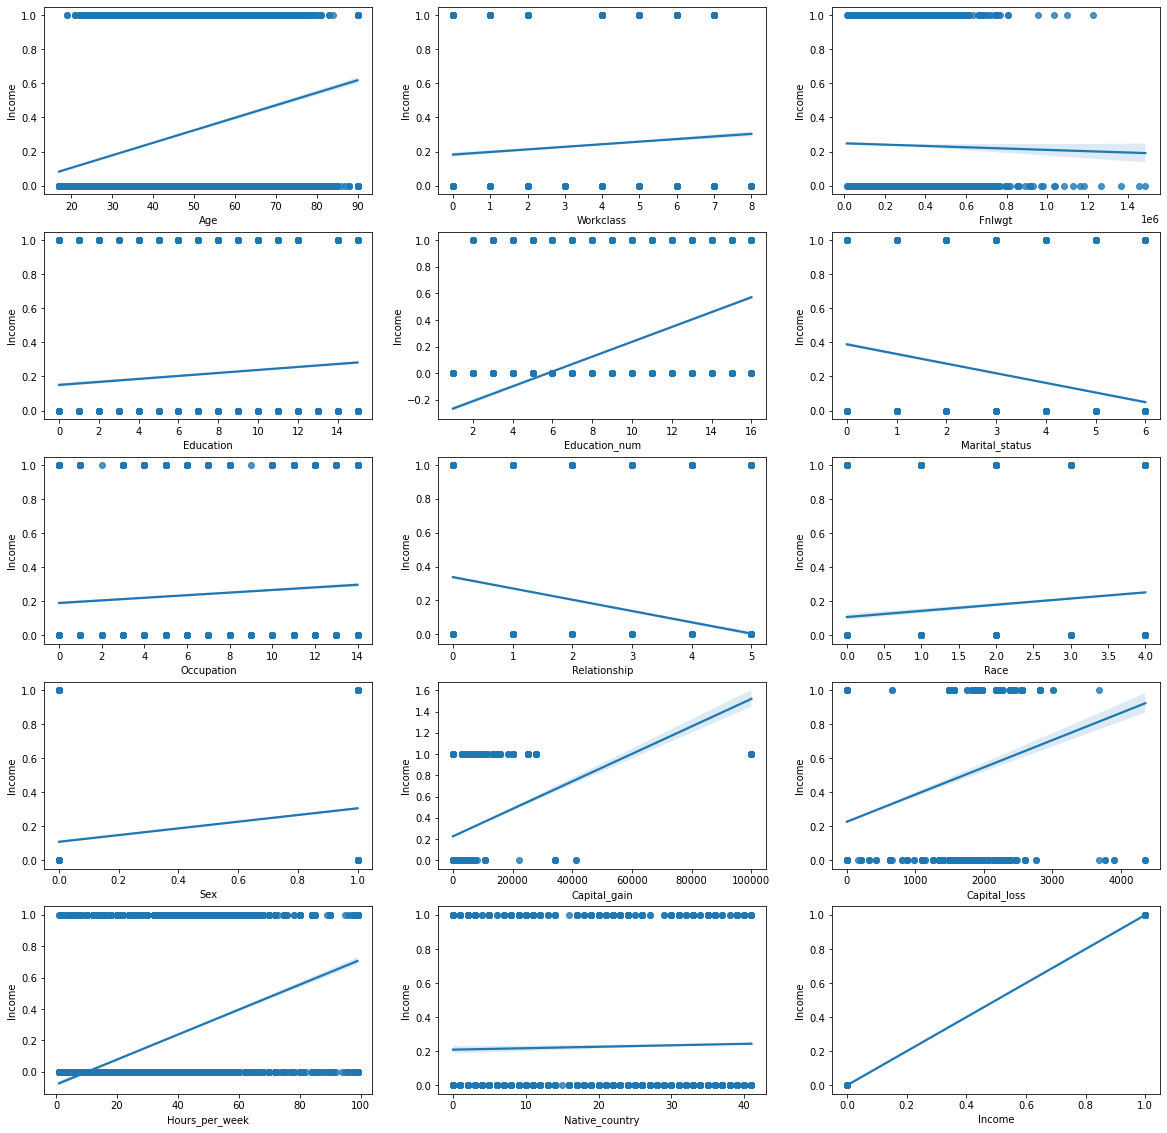

In [21]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.regplot(x=column,y='Income',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


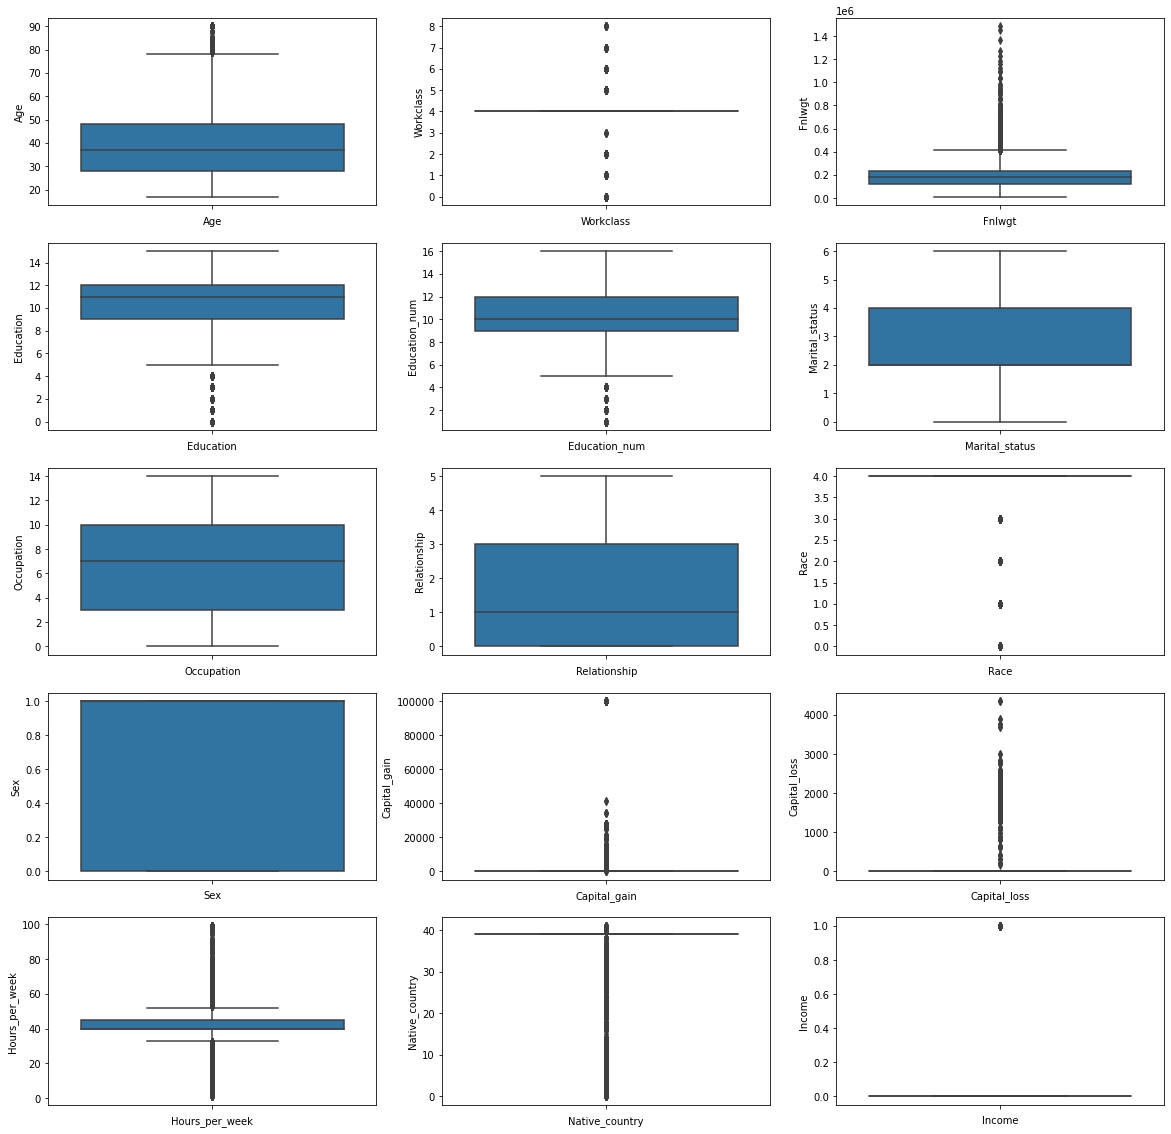

In [22]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
We can see, we have a lot of outliers in our data that need to be removed.


In [23]:
from scipy.stats import zscore

z_score = zscore(df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(29808, 15)

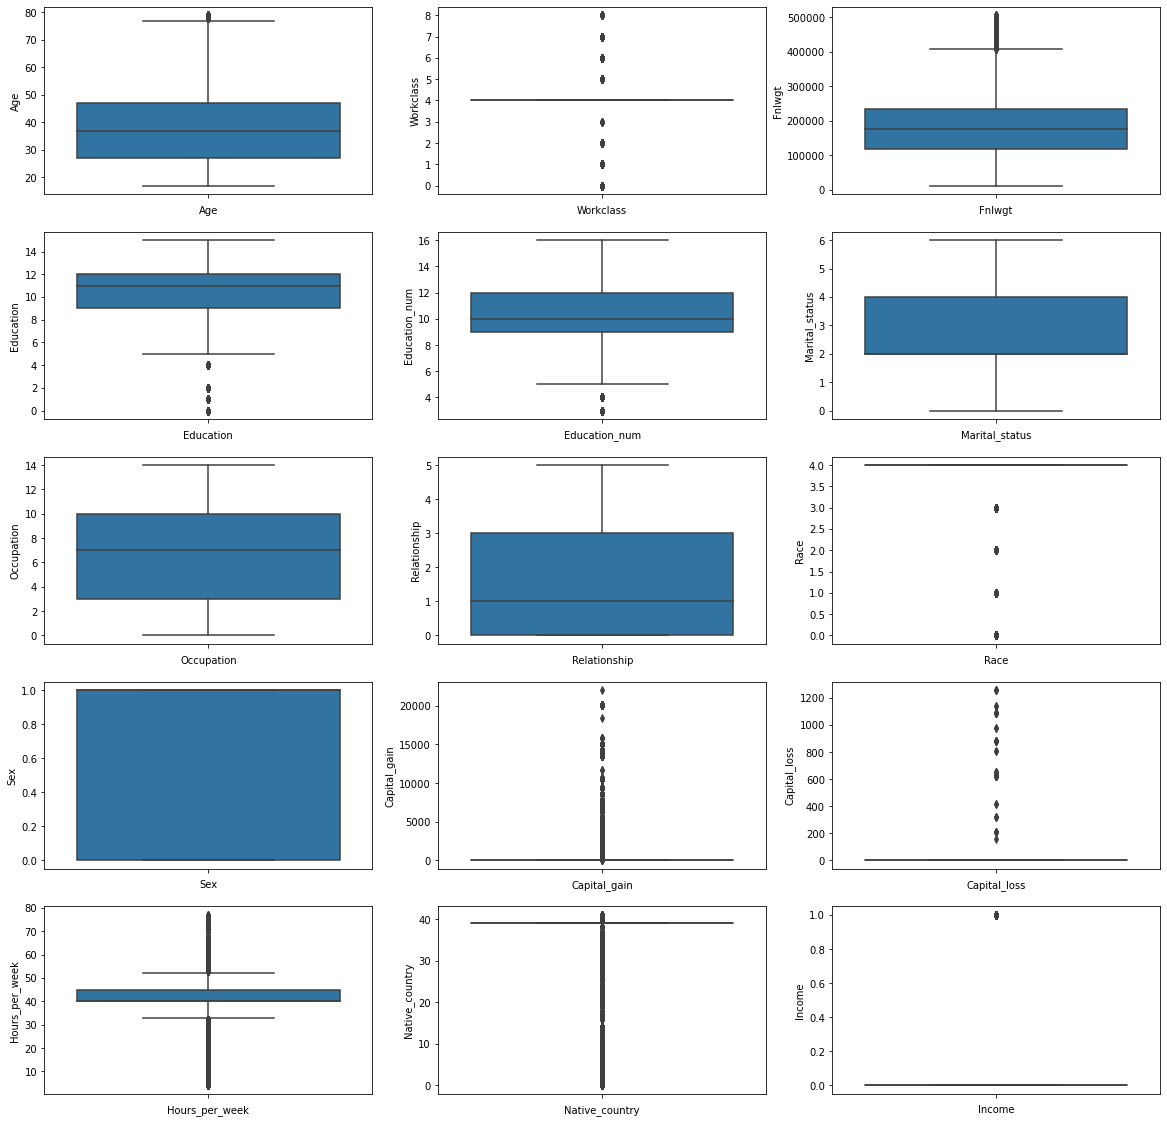

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
We can see decrease in outliers, I will not be removing them further to maintain >90% of our original dataset

Let's check the heatmap for any multi-collinearity problems

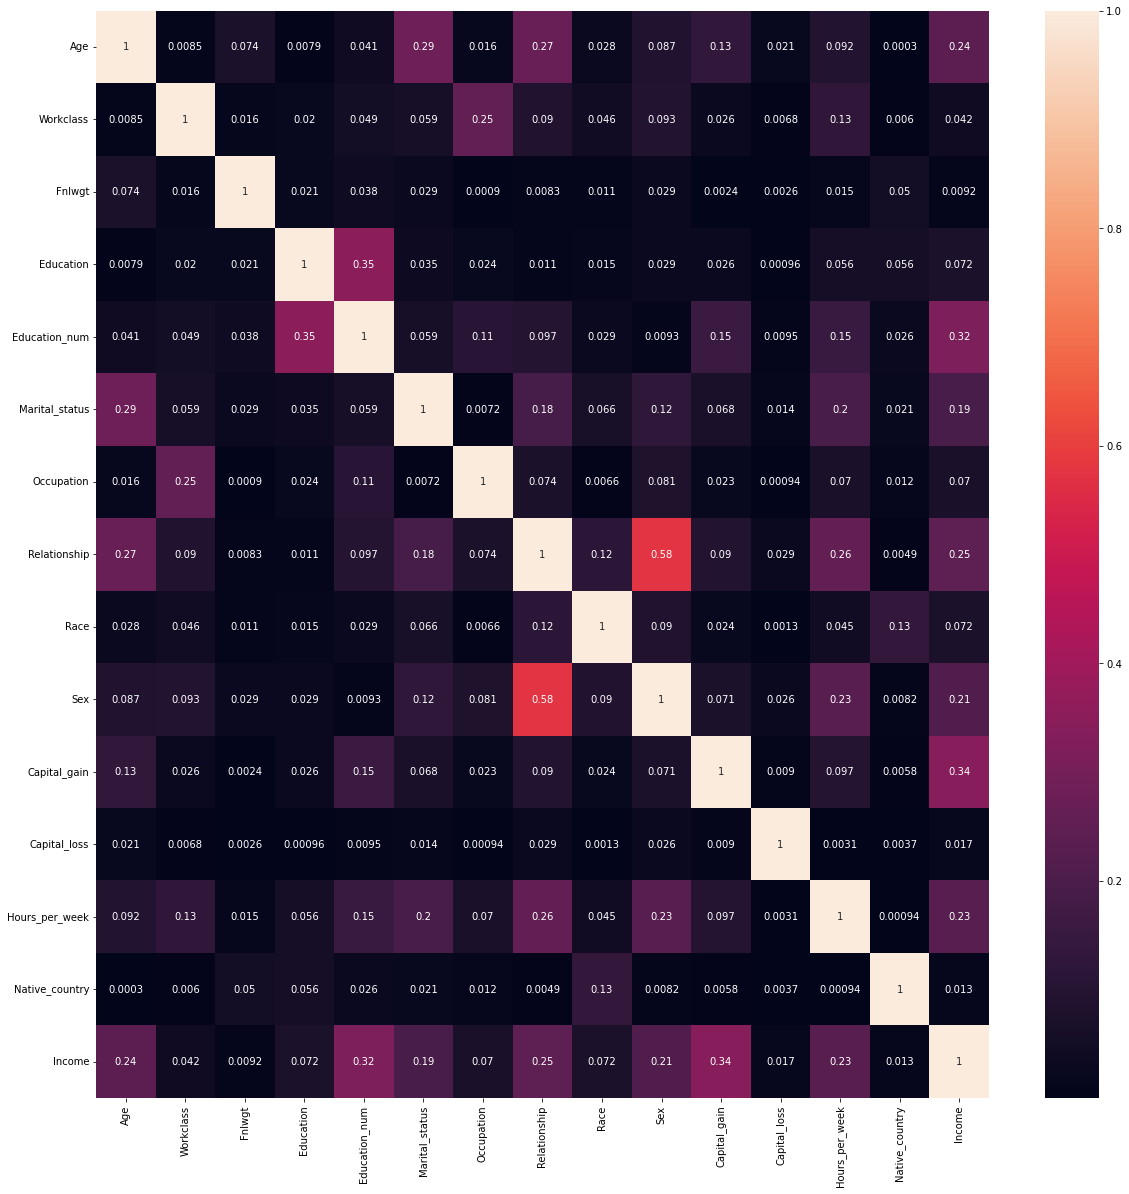

In [25]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

In [ ]:
We can see, Sex and Relationship are somewhat correlated, Let's confirm this using scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

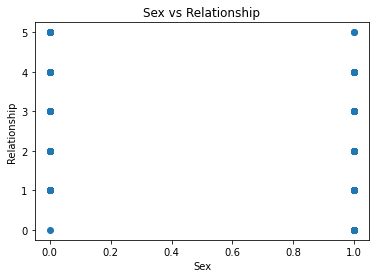

In [26]:
plt.scatter(df['Sex'], df['Relationship'])
plt.xlabel('Sex')
plt.ylabel('Relationship')
plt.title('Sex vs Relationship')
plt.show

In [ ]:
Not enough to delete any columns

In [27]:
df.skew()

Age                0.491125
Workclass         -0.742710
Fnlwgt             0.635160
Education         -0.942833
Education_num     -0.169811
Marital_status    -0.048428
Occupation         0.120164
Relationship       0.743548
Race              -2.435806
Sex               -0.679933
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
Native_country    -3.739522
Income             1.329852
dtype: float64

In [ ]:
Major skewness in capital_loss column and it shows barely any correlation with Income, or any other column for that matter, 
Therefore i will be removing this column

In [28]:
df = df.drop(columns = ['Capital_loss'], axis=1)
df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,20,39,0


In [ ]:
Let's seperate our dataset into featires and target columns

In [29]:
x = df.drop(columns = ['Income'])
y = df.Income

In [30]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,20,39


In [31]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 29808, dtype: int64

In [ ]:
Using Select Percentile to select best features

In [32]:
from sklearn.feature_selection import SelectPercentile, chi2

In [35]:
SPercentile = SelectPercentile(score_func = chi2,percentile = 90)
SPercentile = SPercentile.fit(x,y)

In [36]:
cols = SPercentile.get_support(indices=True)
print('Feature Index: ',cols)

features = x.columns[cols]
print('Features: ',list(features))

Feature Index:  [ 0  2  3  4  5  6  7  8  9 10 11]
Features:  ['Age', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Hours_per_week']


In [37]:
df_scores = pd.DataFrame({'features':x.columns,'Chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})

df_scores.sort_values(by = 'Chi2Score',ascending = False)

,features,Chi2Score,pValue
10,Capital_gain,3.338062e+07,0.000000e+00
2,Fnlwgt,1.207376e+05,0.000000e+00
0,Age,7.984986e+03,0.000000e+00
11,Hours_per_week,4.927191e+03,0.000000e+00
7,Relationship,3.157988e+03,0.000000e+00
4,Education_num,1.807533e+03,0.000000e+00
5,Marital_status,9.854378e+02,2.627805e-216
9,Sex,4.454877e+02,6.920486e-99
6,Occupation,3.971359e+02,2.314239e-88
3,Education,2.226721e+02,2.363422e-50


In [38]:
df.skew()

Age               0.491125
Workclass        -0.742710
Fnlwgt            0.635160
Education        -0.942833
Education_num    -0.169811
Marital_status   -0.048428
Occupation        0.120164
Relationship      0.743548
Race             -2.435806
Sex              -0.679933
Capital_gain      4.941892
Hours_per_week   -0.353124
Native_country   -3.739522
Income            1.329852
dtype: float64

In [39]:
x = df[features]
y = df.Income

In [ ]:
Use Power Transformer to reduce skewness

In [40]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [41]:
x_scaled = scaler.fit_transform(x.values)
x_scaled

array([[ 0.92827771, -1.1140169 , -0.48239527, ...,  0.7162539 ,
        -0.29678572, -2.21784472],
       [ 0.1300798 ,  0.42518144,  0.08491355, ...,  0.7162539 ,
        -0.29678572, -0.03664557],
       [ 1.10322688,  0.60505948, -2.07205472, ...,  0.7162539 ,
        -0.29678572, -0.03664557],
       ...,
       [ 1.3777358 , -0.2361985 ,  0.08491355, ..., -1.39615296,
        -0.29678572, -0.03664557],
       [-1.33614426,  0.28695824,  0.08491355, ...,  0.7162539 ,
        -0.29678572, -1.72221073],
       [ 1.04582245,  1.0743621 ,  0.08491355, ..., -1.39615296,
         3.36947019, -0.03664557]])

In [42]:
x

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week
0,50,83311,9,13,2,4,0,4,1,0,13
1,38,215646,11,9,0,6,1,4,1,0,40
2,53,234721,1,7,2,6,0,2,1,0,40
3,28,338409,9,13,2,10,5,2,0,0,40
4,37,284582,12,14,2,4,5,4,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,7,12,2,13,5,4,0,0,38
32556,40,154374,11,9,2,7,0,4,1,0,40
32557,58,151910,11,9,6,1,4,4,0,0,40
32558,22,201490,11,9,4,1,3,4,1,0,20


In [46]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 29808, dtype: int64

In [44]:
## Now, for accurate predictions, we need to balance our target variable

# Check balance using Counter

In [47]:
from collections import Counter
Counter(y)

Counter({0: 23156, 1: 6652})

In [ ]:
We can see our target variable is highly imbalanced and we need to balance it

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
x_train1,x_test,y_train1,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [50]:
Counter(y_train1)

Counter({0: 18507, 1: 5339})

In [51]:
sm = SMOTE(sampling_strategy=0.8)

In [52]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 18507, 1: 5339}) 
Classes after fitCounter({0: 18507, 1: 14805}) 


In [53]:
## Now that we have balanced our target variable, we can begin Model Training and Testing

In [54]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False: 
        pred= clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [56]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 77.23%

 ======TESTING RESULT======
Accuracy Score: 78.26%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      4649
           1       0.50      0.73      0.60      1313

    accuracy                           0.78      5962
   macro avg       0.71      0.76      0.72      5962
weighted avg       0.82      0.78      0.80      5962



In [57]:
pred = lr.predict(x_test)

In [ ]:
Confusion Matrix

In [58]:
conf_matrix = confusion_matrix(y_test,pred)
conf_matrix

array([[3703,  946],
       [ 350,  963]], dtype=int64)

In [ ]:
We can note that we are getting training accuracy of 77.10% and Testing accuracy of 77.96% with Logistic Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [59]:
from sklearn.svm import SVC

In [60]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [61]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
Check Training Accuracies for other models:

In [62]:
print(lr.score(x_train,y_train))
print(knn.score(x_train,y_train))
print(dec.score(x_train,y_train))
print(ran.score(x_train,y_train))
print(svc.score(x_train,y_train))
print(xgb.score(x_train,y_train))

0.772274255523535
0.8927113352545629
0.9999699807877042
0.9999699807877042
0.8233969740634006
0.9230907780979827


In [ ]:
Check Testing Accuracies for other models:

In [63]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(svc.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7826232807782624
0.7812814491781281
0.7990607178799061
0.8399865816839986
0.7876551492787656
0.8555853740355586


In [ ]:
Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

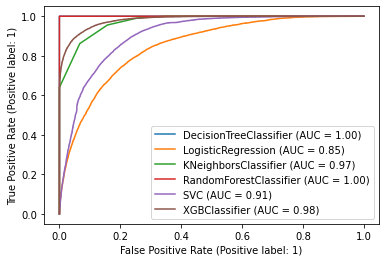

In [64]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

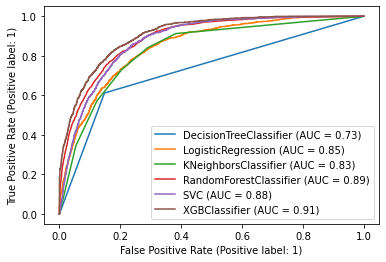

In [65]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
Best Perfoming Models: XGB, SVC and Logistic Regression

Log Reg is the most consistent model
XGB is the model with best accuracy amongst the 3 but least consistency
SVC is consistent as well as has higher accuracy than Log Reg
Therefore, SVC is my best perfoming model

Let's perform some hyperparameter tuning to try and increase the model performance further

In [66]:
params = {'C':[1,5,10,15,20,25,30],
         'gamma':[0.001,0.01,0.02,0.002],
        }

In [ ]:
grid = GridSearchCV(svc, param_grid = params, n_jobs=-1)
grid.fit(x_train,y_train)

In [ ]:
print('best parameters: ',grid.best_params_)

In [ ]:
svc_grid = grid.best_estimator_
svc_grid.fit(x_train,y_train)svc_grid = grid.best_estimator_
svc_grid.fit(x_train,y_train)

In [ ]:
metric_score(svc_grid,x_train,x_test,y_train,y_test,train = True)
metric_score(svc_grid,x_train,x_test,y_train,y_test,train = False)

In [ ]:
Tuning did not increase our accuracy in this case, So we will use our Original SVC model for predictions as our best model.

XGB or LogReg models can also be used if accuracy or consistency (respctively) take precedence.